<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12.08.21
Upload three csv files:
1. dataset for training and testing 
2. dataset for records identification ('location key', 'postal code' and 'district) - this to be joined with data after predictions were done so the quality of predictions could be analysed by location.



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving train_and_test_data.csv to train_and_test_data.csv
Saving locations_categorical_features.csv to locations_categorical_features.csv
User uploaded file "train_and_test_data.csv" with length 161197304 bytes
User uploaded file "locations_categorical_features.csv" with length 27802193 bytes


In [2]:
import pandas as pd
from pathlib import Path

In [3]:
df_location_categories = pd.read_csv("locations_categorical_features.csv") 
df_location_categories

,location_key,postcode,district
0,100000460_235813700_173697830,IP28 6QS,ST EDMUNDSBURY
1,100000900_306645770_193413260,PO2 9AE,PORTSMOUTH
2,100001709_306232250_192988720,PO2 8NT,PORTSMOUTH
3,100002450_241021470_178393000,IP33 3UF,ST EDMUNDSBURY
4,100002500_240933210_178314290,IP33 3UE,ST EDMUNDSBURY
...,...,...,...
562389,99996800_303056370_189735890,PO16 9PA,FAREHAM
562390,99998470_302856560_189531620,PO16 9UH,FAREHAM
562391,99998690_306575700_193341460,PO2 9BS,PORTSMOUTH
562392,9999870_270237390_170268490,SE21 7EU,SOUTHWARK


In [4]:
df_train_test_data = pd.read_csv("train_and_test_data.csv") 
df_train_test_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,53.489825,-2.358860,100000.0
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,53.528583,-2.270335,79500.0
2,1,L,F,12.0,85.979811,0.584296,20.0,11.5,9.8,73416.66667,64341.66667,4,16016690000,25505656000,21724217000,52.637255,1.298314,128000.0
3,1,L,F,3.0,89.636307,0.452391,13.0,9.7,8.3,101666.66670,101666.66670,14,6296533000,26014878000,18039516000,51.868112,0.544362,170000.0
4,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,53.420228,-2.966120,33000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135504,47,L,T,12.0,72.452903,1.542007,39.0,8.5,7.5,37625.00000,40499.37500,14,27236922000,1773271000,12075555000,53.502594,-2.516861,79000.0
1135505,48,F,S,1.0,0.000000,0.000000,0.0,0.0,0.0,40000.00000,50500.00000,16,21104985000,21110074000,12654123000,51.674615,-3.212091,53000.0
1135506,55,F,T,1.0,0.000000,0.000000,0.0,0.0,0.0,41333.33333,45416.66667,14,27804846000,6355589000,11793603000,53.245090,-3.123599,70000.0
1135507,81,L,T,1.0,88.443148,2.462274,25.0,9.7,7.7,54000.00000,56650.00000,16,28051597900,2906478000,14022715000,53.734079,-2.140287,95000.0


In [5]:

df_train_test_data['location_key']=(round((df_train_test_data ['distances_Lond']*0.01),0).astype(int)).astype(str) + '_' + (round((df_train_test_data ['distances_Manch']*0.01),0).astype(int)).astype(str)+ '_' + (round((df_train_test_data ['distances_Birming']*0.01),0).astype(int)).astype(str)
df_train_test_data

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid,location_key
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,53.489825,-2.358860,100000.0,265107680_7185400_116222960
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,53.528583,-2.270335,79500.0,265399700_5426470_119029830
2,1,L,F,12.0,85.979811,0.584296,20.0,11.5,9.8,73416.66667,64341.66667,4,16016690000,25505656000,21724217000,52.637255,1.298314,128000.0,160166900_255056560_217242170
3,1,L,F,3.0,89.636307,0.452391,13.0,9.7,8.3,101666.66670,101666.66670,14,6296533000,26014878000,18039516000,51.868112,0.544362,170000.0,62965330_260148780_180395160
4,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,53.420228,-2.966120,33000.0,284376870_47818980_126332220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135504,47,L,T,12.0,72.452903,1.542007,39.0,8.5,7.5,37625.00000,40499.37500,14,27236922000,1773271000,12075555000,53.502594,-2.516861,79000.0,272369220_17732710_120755550
1135505,48,F,S,1.0,0.000000,0.000000,0.0,0.0,0.0,40000.00000,50500.00000,16,21104985000,21110074000,12654123000,51.674615,-3.212091,53000.0,211049850_211100740_126541230
1135506,55,F,T,1.0,0.000000,0.000000,0.0,0.0,0.0,41333.33333,45416.66667,14,27804846000,6355589000,11793603000,53.245090,-3.123599,70000.0,278048460_63555890_117936030
1135507,81,L,T,1.0,88.443148,2.462274,25.0,9.7,7.7,54000.00000,56650.00000,16,28051597900,2906478000,14022715000,53.734079,-2.140287,95000.0,280515979_29064780_140227150


In [6]:
#'round coordinates' will represent the lattitude and longitude as following examples:
#if long is 2 and lat is 50 then the 'round coordinates' 250
#if long is 1 and lat is 52 then the 'round coordinates' 152
#if long is 0 and lat is 51 then the 'round coordinates' 51
#if long is -1 and lat is 54 then the 'round coordinates'-154
#1. below 'round coordinates' calculated to be one of the three: -1, 0, 1
df_train_test_data['round_coordinates']=(round((round(df_train_test_data['long'],0)*100)/(abs(round(df_train_test_data['long'],0)*100)+0.1),0))
#2.split the dataset into three according subsets to the round_coordinates
df_train_test_data_a=df_train_test_data[(df_train_test_data['round_coordinates'] ==-1) ]
df_train_test_data_b=df_train_test_data[(df_train_test_data['round_coordinates'] ==-0) ]
df_train_test_data_c=df_train_test_data[(df_train_test_data['round_coordinates'] ==1) ]
#3.calculated 'round_coordinates' as 250, 152, 51, -154 etc
df_train_test_data_a['round_coordinates']=round(df_train_test_data_a['long'],0)*100-round(df_train_test_data_a['lat'],0)
df_train_test_data_b['round_coordinates']=round(df_train_test_data_b['lat'],0)
df_train_test_data_c['round_coordinates']=round(df_train_test_data_c['long'],0)*100+round(df_train_test_data_c['lat'],0)
frames = [df_train_test_data_a, df_train_test_data_b,df_train_test_data_c]
df_train_test_data = pd.concat(frames)
df_train_test_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid,location_key,round_coordinates
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,53.489825,-2.358860,100000.0,265107680_7185400_116222960,-253.0
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,53.528583,-2.270335,79500.0,265399700_5426470_119029830,-254.0
4,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,53.420228,-2.966120,33000.0,284376870_47818980_126332220,-353.0
5,1,F,T,9.0,112.349601,0.825940,28.0,10.7,10.2,39566.66667,38000.00000,25,34946148000,13477860000,23550813000,54.573745,-1.357843,70000.0,349461480_134778600_235508130,-155.0
8,1,L,F,6.0,96.623644,0.711299,17.0,9.2,8.6,84000.00000,80500.00000,14,18746810000,16004641000,7269215000,52.072405,-2.739479,94000.0,187468100_160046410_72692150,-352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135460,13,F,D,7.0,145.232100,1.323673,87.0,8.5,7.4,85333.33333,89200.00000,25,8895315000,34918743000,24793358000,50.851889,0.549997,700000.0,88953150_349187430_247933580,151.0
1135475,15,F,D,8.0,82.913308,1.486402,0.0,2.2,3.5,110000.00000,104333.33330,12,11281220000,34346965000,26086014900,51.366607,1.442842,780000.0,112812200_343469650_260860149,151.0
1135476,15,F,D,9.0,73.513814,1.361330,18.0,10.9,9.8,69500.00000,77500.00000,9,11005371000,28077105000,21559292000,52.044961,1.181779,395000.0,110053710_280771050_215592920,152.0
1135481,16,F,S,6.0,143.368856,2.399314,26.0,8.7,8.3,95125.00000,95125.00000,3,8965998000,34979932000,24893196000,50.858060,0.581838,695000.0,89659980_349799320_248931960,151.0


In [7]:
data_for_analysis = pd.merge(df_train_test_data, df_location_categories, how="left", on="location_key")
data_for_analysis['postcode_area']=data_for_analysis['postcode'].str.split(' ').str[0]
data_for_analysis

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid,location_key,round_coordinates,postcode,district,postcode_area
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,53.489825,-2.358860,100000.0,265107680_7185400_116222960,-253.0,M30 8EG,SALFORD,M30
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,53.528583,-2.270335,79500.0,265399700_5426470_119029830,-254.0,M25 1ET,BURY,M25
2,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,53.420228,-2.966120,33000.0,284376870_47818980_126332220,-353.0,L5 4TD,LIVERPOOL,L5
3,1,F,T,9.0,112.349601,0.825940,28.0,10.7,10.2,39566.66667,38000.00000,25,34946148000,13477860000,23550813000,54.573745,-1.357843,70000.0,349461480_134778600_235508130,-155.0,TS19 7HX,STOCKTON-ON-TEES,TS19
4,1,L,F,6.0,96.623644,0.711299,17.0,9.2,8.6,84000.00000,80500.00000,14,18746810000,16004641000,7269215000,52.072405,-2.739479,94000.0,187468100_160046410_72692150,-352.0,HR4 9NL,HEREFORDSHIRE,HR4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135504,13,F,D,7.0,145.232100,1.323673,87.0,8.5,7.4,85333.33333,89200.00000,25,8895315000,34918743000,24793358000,50.851889,0.549997,700000.0,88953150_349187430_247933580,151.0,TN38 0NB,HASTINGS,TN38
1135505,15,F,D,8.0,82.913308,1.486402,0.0,2.2,3.5,110000.00000,104333.33330,12,11281220000,34346965000,26086014900,51.366607,1.442842,780000.0,112812200_343469650_260860149,151.0,CT10 1EB,THANET,CT10
1135506,15,F,D,9.0,73.513814,1.361330,18.0,10.9,9.8,69500.00000,77500.00000,9,11005371000,28077105000,21559292000,52.044961,1.181779,395000.0,110053710_280771050_215592920,152.0,IP3 9AG,IPSWICH,IP3
1135507,16,F,S,6.0,143.368856,2.399314,26.0,8.7,8.3,95125.00000,95125.00000,3,8965998000,34979932000,24893196000,50.858060,0.581838,695000.0,89659980_349799320_248931960,151.0,TN34 1SJ,HASTINGS,TN34


In [ ]:
from google.colab import files
with open('dataset_analysis.csv', 'w') as f:
  #f.write('some content')
  data_for_analysis.to_csv('dataset_analysis.csv', index=False)
files.download('dataset_analysis.csv')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
#quick description of data
data_for_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135509 entries, 0 to 1135508
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   num_of_beds               1135509 non-null  int64  
 1   estate_type               1135509 non-null  object 
 2   property_type             1135509 non-null  object 
 3   num_of_sec_sch            1135509 non-null  float64
 4   score_disadv              1135509 non-null  float64
 5   closest_sch_distance      1135509 non-null  float64
 6   closest_disadv_prct       1135509 non-null  float64
 7   closest_aver_attain_eng   1135509 non-null  float64
 8   closest_aver_attain_math  1135509 non-null  float64
 9   median_ppb_3mnths_ago     1135509 non-null  float64
 10  median_ppb_4mnths_ago     1135509 non-null  float64
 11  hist_mnth                 1135509 non-null  int64  
 12  distances_Lond            1135509 non-null  int64  
 13  distances_Manch           1

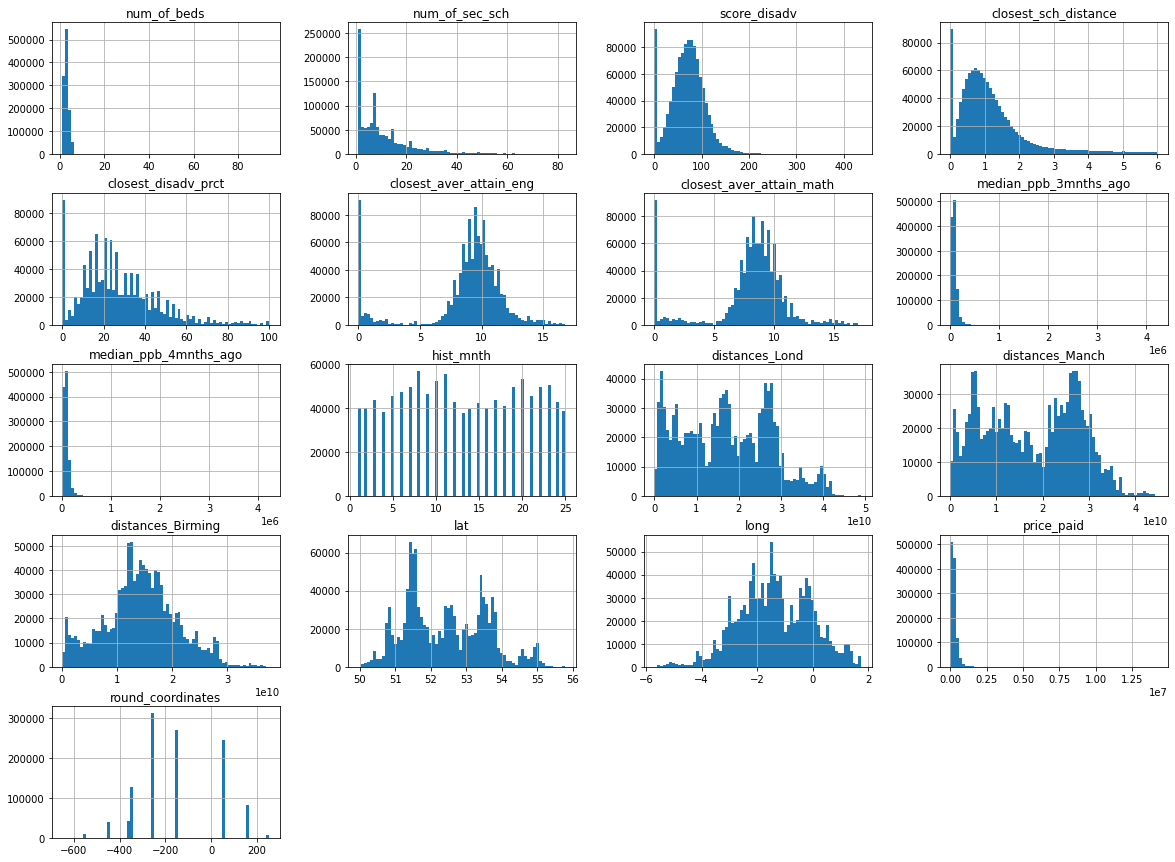

In [9]:
#histograms for each numerical attribute
import matplotlib.pyplot as plt
data_for_analysis.hist(bins=70,figsize=(20,15))
plt.show()

In [10]:
data_for_analysis.describe()

,num_of_beds,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid,round_coordinates
count,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06,1.135509e+06
mean,2.950604e+00,1.108518e+01,6.922673e+01,1.199190e+00,2.685472e+01,8.688329e+00,7.936563e+00,9.054470e+04,9.041141e+04,1.306080e+01,1.716934e+10,1.759131e+10,1.439201e+10,5.241290e+01,-1.364797e+00,2.728355e+05,-1.564106e+02
std,9.167998e-01,1.143166e+01,3.705440e+01,1.050902e+00,1.825855e+01,3.461117e+00,3.213545e+00,5.467009e+04,5.510642e+04,7.122308e+00,1.048057e+10,1.009366e+10,6.591179e+09,1.131499e+00,1.296043e+00,2.214063e+05,1.730235e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+03,6.000000e+03,1.000000e+00,4.927000e+06,4.740100e+07,6.766800e+07,4.996449e+01,-5.703281e+00,1.000000e+00,-6.500000e+02
25%,2.000000e+00,3.000000e+00,4.673200e+01,5.425154e-01,1.400000e+01,8.300000e+00,7.400000e+00,5.662500e+04,5.633333e+04,7.000000e+00,8.074014e+09,8.496831e+09,1.057220e+10,5.147504e+01,-2.231610e+00,1.450000e+05,-2.540000e+02
50%,3.000000e+00,8.000000e+00,7.009988e+01,9.488052e-01,2.400000e+01,9.500000e+00,8.600000e+00,7.750000e+04,7.750000e+04,1.300000e+01,1.682340e+10,1.771035e+10,1.436784e+10,5.236152e+01,-1.427527e+00,2.200000e+05,-1.540000e+02
75%,3.000000e+00,1.500000e+01,9.173030e+01,1.508500e+00,3.700000e+01,1.050000e+01,9.600000e+00,1.093750e+05,1.091250e+05,1.900000e+01,2.586724e+10,2.647253e+10,1.830818e+10,5.339573e+01,-3.400980e-01,3.320000e+05,5.100000e+01
max,9.400000e+01,8.300000e+01,4.375126e+02,5.999944e+00,1.000000e+02,1.680000e+01,1.730000e+01,4.230000e+06,4.230000e+06,2.500000e+01,4.904366e+10,4.478428e+10,3.758341e+10,5.578674e+01,1.756652e+00,1.425000e+07,2.530000e+02


No handles with labels found to put in legend.


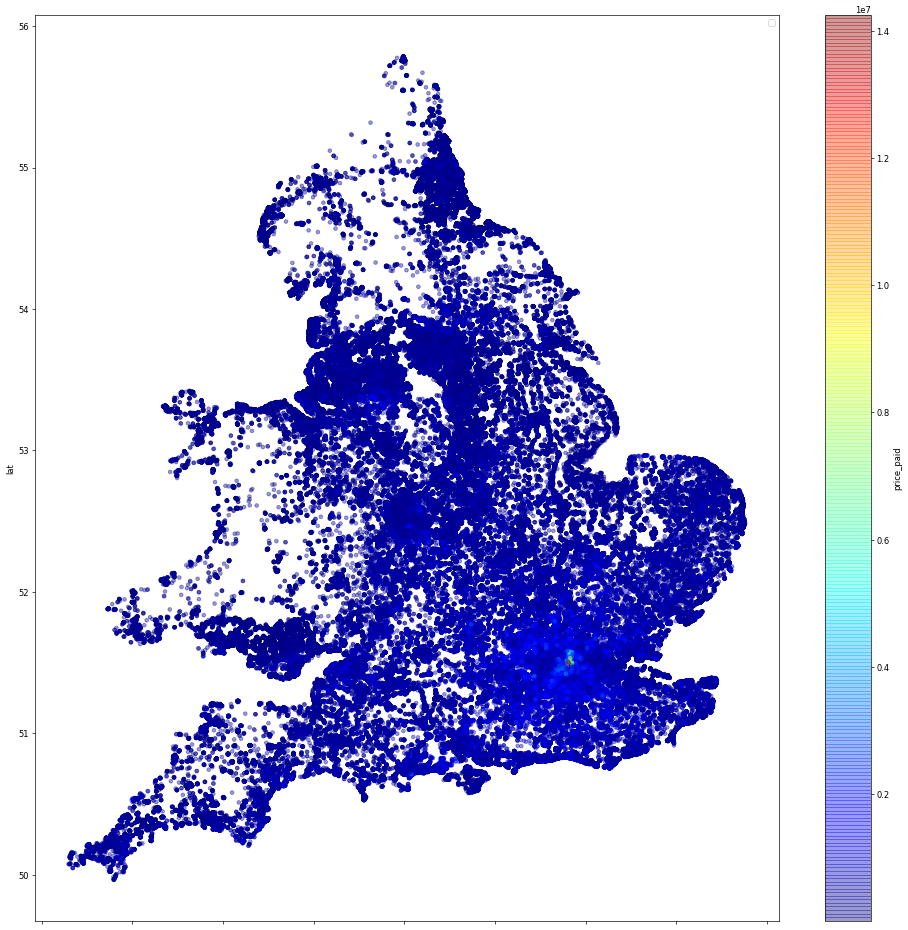

In [12]:
data_for_analysis.plot(kind="scatter", x="long", y="lat", alpha=0.4, c="price_paid", cmap=plt.get_cmap("jet"), colorbar=True)
plt.rcParams.update({'figure.figsize':(30,30), 'figure.dpi':70})
plt.legend()

In [14]:
corr_matrix=data_for_analysis.corr()


In [15]:
corr_matrix["price_paid"].sort_values(ascending=False)

price_paid                  1.000000
median_ppb_4mnths_ago       0.737128
median_ppb_3mnths_ago       0.736754
num_of_beds                 0.440856
distances_Manch             0.362712
round_coordinates           0.323916
long                        0.292910
num_of_sec_sch              0.286851
closest_aver_attain_math    0.179450
closest_aver_attain_eng     0.170812
distances_Birming           0.082898
closest_sch_distance        0.048257
hist_mnth                   0.009272
closest_disadv_prct        -0.085801
score_disadv               -0.122290
lat                        -0.377923
distances_Lond             -0.490924
Name: price_paid, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccff5ef850>,
      dtype=object)

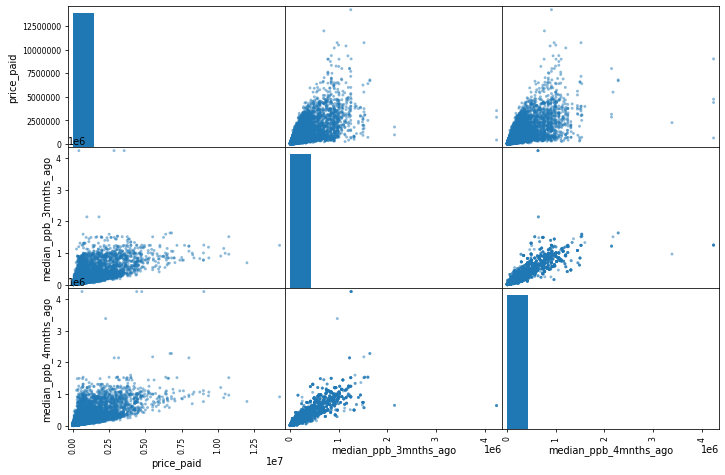

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["price_paid",	"median_ppb_3mnths_ago",	"median_ppb_4mnths_ago"]
scatter_matrix(data_for_analysis[attributes],figsize=(12,8))

In [18]:
#outliers removal (first stage)
data_for_analysis=data_for_analysis[(data_for_analysis['num_of_beds'] <=5) & (data_for_analysis['price_paid'] > 10000) & (data_for_analysis['price_paid'] <1500000) ]


In [19]:
corr_matrix=data_for_analysis.corr()
corr_matrix["price_paid"].sort_values(ascending=False)

price_paid                  1.000000
median_ppb_3mnths_ago       0.728089
median_ppb_4mnths_ago       0.727267
num_of_beds                 0.459715
distances_Manch             0.417105
round_coordinates           0.359726
long                        0.330001
num_of_sec_sch              0.253807
closest_aver_attain_math    0.198269
closest_aver_attain_eng     0.185467
distances_Birming           0.093237
closest_sch_distance        0.067277
hist_mnth                   0.011817
closest_disadv_prct        -0.121679
score_disadv               -0.159298
lat                        -0.436920
distances_Lond             -0.552206
Name: price_paid, dtype: float64

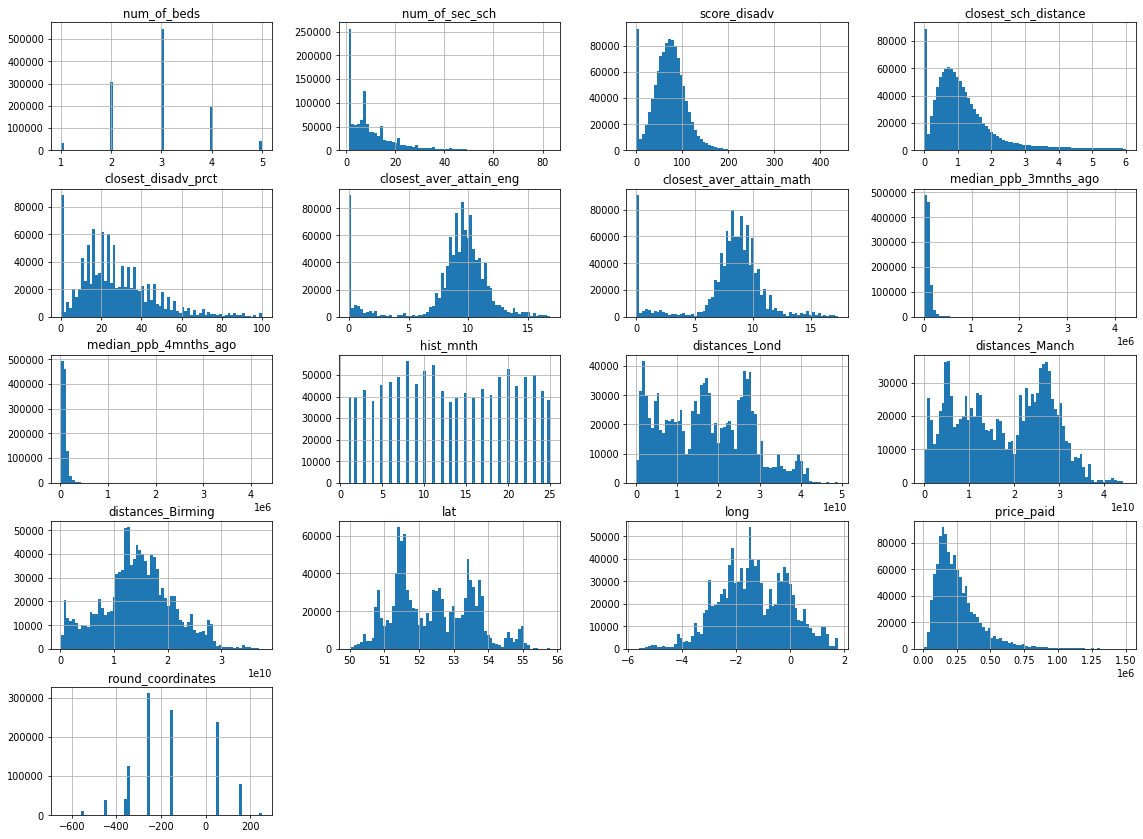

In [20]:
#histograms for each numerical attribute
import matplotlib.pyplot as plt
data_for_analysis.hist(bins=70,figsize=(20,15))
plt.show()

In [22]:
data_null_sch=data_for_analysis[(data_for_analysis['closest_sch_distance']==0)  ]
data_null_sch

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid,location_key,round_coordinates,postcode,district,postcode_area
9,1,F,T,1.0,0.0,0.0,0.0,0.0,0.0,49250.00000,50000.00000,13,29414497000,7569390000,13383219000,53.307702,-3.355185,95000.0,294144970_75693900_133832190,-353.0,LL18 6EA,FLINTSHIRE,LL18
14,1,L,F,1.0,0.0,0.0,0.0,0.0,0.0,65000.00000,59375.00000,11,20729542900,23063275000,14047007000,51.482482,-3.162014,91500.0,207295429_230632750_140470070,-351.0,CF24 0HX,CARDIFF,CF24
24,1,L,F,1.0,0.0,0.0,0.0,0.0,0.0,93333.33333,91666.66667,10,20987384000,22723195000,13877507000,51.521006,-3.200959,106000.0,209873840_227231950_138775070,-352.0,CF14 4NJ,CARDIFF,CF14
41,1,L,F,1.0,0.0,0.0,0.0,0.0,0.0,54000.00000,50500.00000,7,27024382000,6240067000,11006695000,53.187741,-3.052387,74000.0,270243820_62400670_110066950,-353.0,CH5 3UW,FLINTSHIRE,CH5
45,1,F,T,1.0,0.0,0.0,0.0,0.0,0.0,61250.00000,66000.00000,24,30295314000,8759008000,14257943000,53.302118,-3.537627,104000.0,302953140_87590080_142579430,-453.0,LL22 9PH,CONWY,LL22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134663,5,F,D,1.0,0.0,0.0,0.0,0.0,0.0,100000.00000,86666.66667,24,10364600000,34766633000,25895907000,51.189744,1.231965,400000.0,103646000_347666330_258959070,151.0,CT15 7PF,DOVER,CT15
1134667,5,F,D,1.0,0.0,0.0,0.0,0.0,0.0,113000.00000,119625.00000,11,7481212000,28001860000,20141965000,51.788445,0.821945,530000.0,74812120_280018600_201419650,152.0,CM9 8HJ,COLCHESTER,CM9
1134680,5,F,D,1.0,0.0,0.0,0.0,0.0,0.0,92500.00000,92500.00000,1,15894052000,20375863000,17559707000,52.857930,0.623706,698000.0,158940520_203758630_175597070,153.0,PE31 6RJ,KING'S LYNN AND WEST NORFOLK,PE31
1134693,5,F,D,1.0,0.0,0.0,0.0,0.0,0.0,124321.00000,126500.00000,22,9834097000,34334838000,25401151000,51.200000,1.156689,875000.0,98340970_343348380_254011510,151.0,CT4 6QD,CANTERBURY,CT4


In [23]:
#outliers removal (second stage)
data_for_analysis=data_for_analysis[(data_for_analysis['closest_sch_distance'] !=0) ]
data_for_analysis

,num_of_beds,estate_type,property_type,num_of_sec_sch,score_disadv,closest_sch_distance,closest_disadv_prct,closest_aver_attain_eng,closest_aver_attain_math,median_ppb_3mnths_ago,median_ppb_4mnths_ago,hist_mnth,distances_Lond,distances_Manch,distances_Birming,lat,long,price_paid,location_key,round_coordinates,postcode,district,postcode_area
0,1,L,T,23.0,110.178111,0.671216,96.0,0.5,0.9,60250.00000,56187.50000,7,26510768000,718540000,11622296000,53.489825,-2.358860,100000.0,265107680_7185400_116222960,-253.0,M30 8EG,SALFORD,M30
1,1,L,S,24.0,78.275669,0.320619,15.0,10.8,9.4,79166.66667,79000.00000,23,26539970000,542647000,11902983000,53.528583,-2.270335,79500.0,265399700_5426470_119029830,-254.0,M25 1ET,BURY,M25
2,1,L,F,34.0,94.537513,0.458854,63.0,8.1,7.7,25562.50000,25000.00000,9,28437687000,4781898000,12633222000,53.420228,-2.966120,33000.0,284376870_47818980_126332220,-353.0,L5 4TD,LIVERPOOL,L5
3,1,F,T,9.0,112.349601,0.825940,28.0,10.7,10.2,39566.66667,38000.00000,25,34946148000,13477860000,23550813000,54.573745,-1.357843,70000.0,349461480_134778600_235508130,-155.0,TS19 7HX,STOCKTON-ON-TEES,TS19
4,1,L,F,6.0,96.623644,0.711299,17.0,9.2,8.6,84000.00000,80500.00000,14,18746810000,16004641000,7269215000,52.072405,-2.739479,94000.0,187468100_160046410_72692150,-352.0,HR4 9NL,HEREFORDSHIRE,HR4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134691,5,F,D,5.0,22.630694,1.509915,15.0,9.9,8.3,115000.00000,130000.00000,7,5513139000,28173356000,19568002000,51.635748,0.605415,610000.0,55131390_281733560_195680020,152.0,CM3 7BG,CHELMSFORD,CM3
1134692,5,F,D,2.0,61.011655,1.712769,26.0,7.8,6.4,164166.66670,95000.00000,7,6499965000,32355537000,22537972000,51.111478,0.511342,920000.0,64999650_323555370_225379720,151.0,TN17 2PZ,TUNBRIDGE WELLS,TN17
1134694,5,F,S,1.0,25.029489,4.527677,17.0,9.9,9.3,81041.66667,95000.00000,7,13606215000,26502134900,21414459000,52.371110,1.248076,344000.0,136062150_265021349_214144590,152.0,IP21 4JP,SOUTH NORFOLK,IP21
1134696,5,F,D,1.0,91.031230,1.208883,19.0,7.9,8.2,78666.66667,73333.33333,10,13605691000,23043847000,18610057000,52.567696,0.841965,410000.0,136056910_230438470_186100570,153.0,IP25 6HF,BRECKLAND,IP25


In [24]:
corr_matrix=data_for_analysis.corr()
corr_matrix["price_paid"].sort_values(ascending=False)

price_paid                  1.000000
median_ppb_3mnths_ago       0.728751
median_ppb_4mnths_ago       0.727853
num_of_beds                 0.461153
distances_Manch             0.435168
round_coordinates           0.351187
long                        0.317701
num_of_sec_sch              0.245955
closest_aver_attain_math    0.200539
closest_aver_attain_eng     0.183551
distances_Birming           0.096421
closest_sch_distance        0.042317
hist_mnth                   0.011472
closest_disadv_prct        -0.179225
score_disadv               -0.250486
lat                        -0.462769
distances_Lond             -0.553162
Name: price_paid, dtype: float64

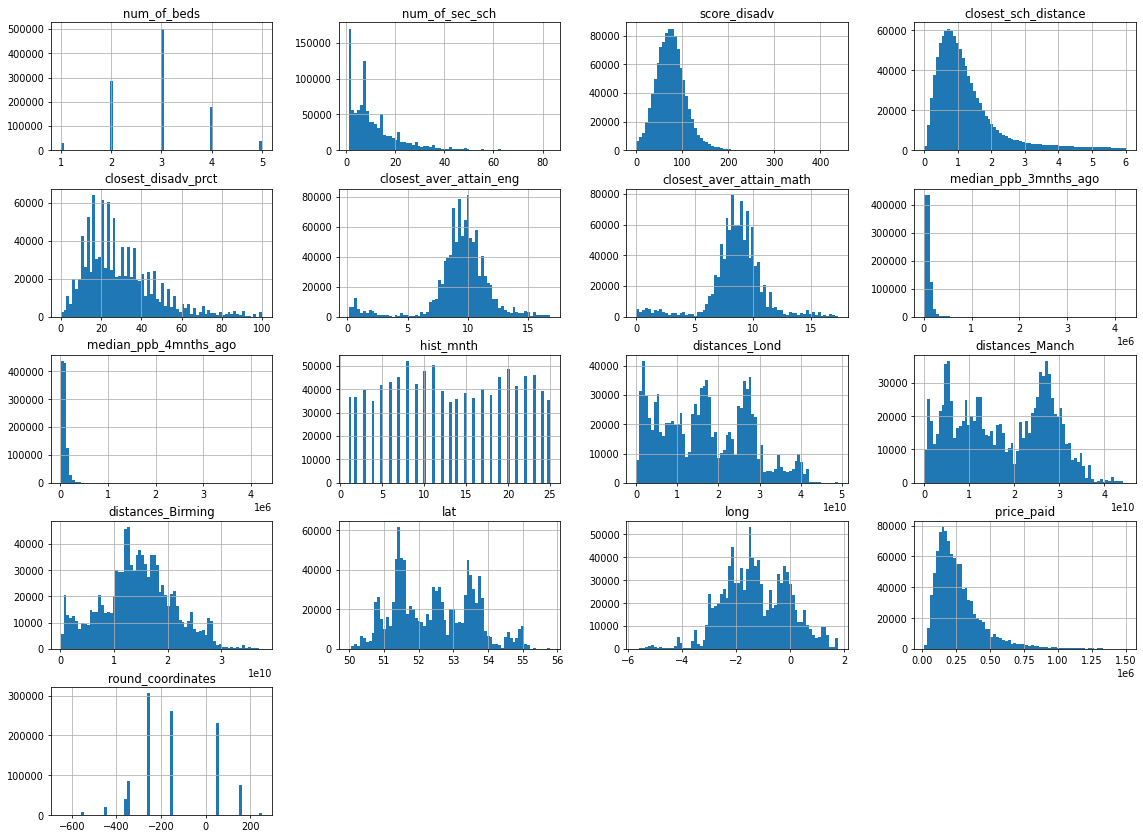

In [25]:
#histograms for each numerical attribute
import matplotlib.pyplot as plt
data_for_analysis.hist(bins=70,figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccffa97e90>,
      dtype=object)

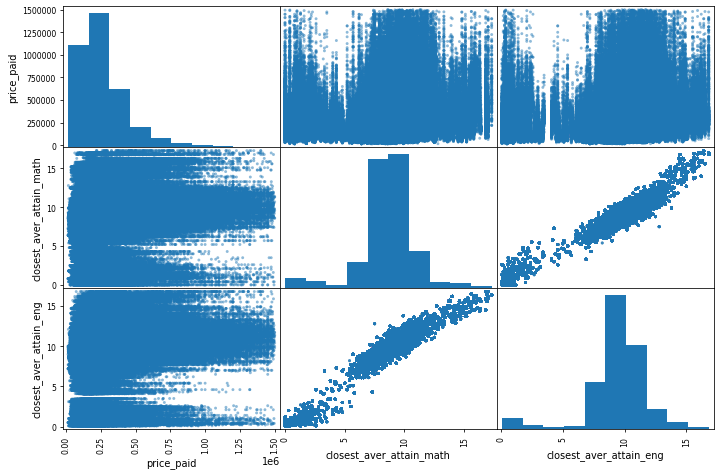

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["price_paid",	"closest_aver_attain_math",	"closest_aver_attain_eng"]
scatter_matrix(data_for_analysis[attributes],figsize=(12,8))

No handles with labels found to put in legend.


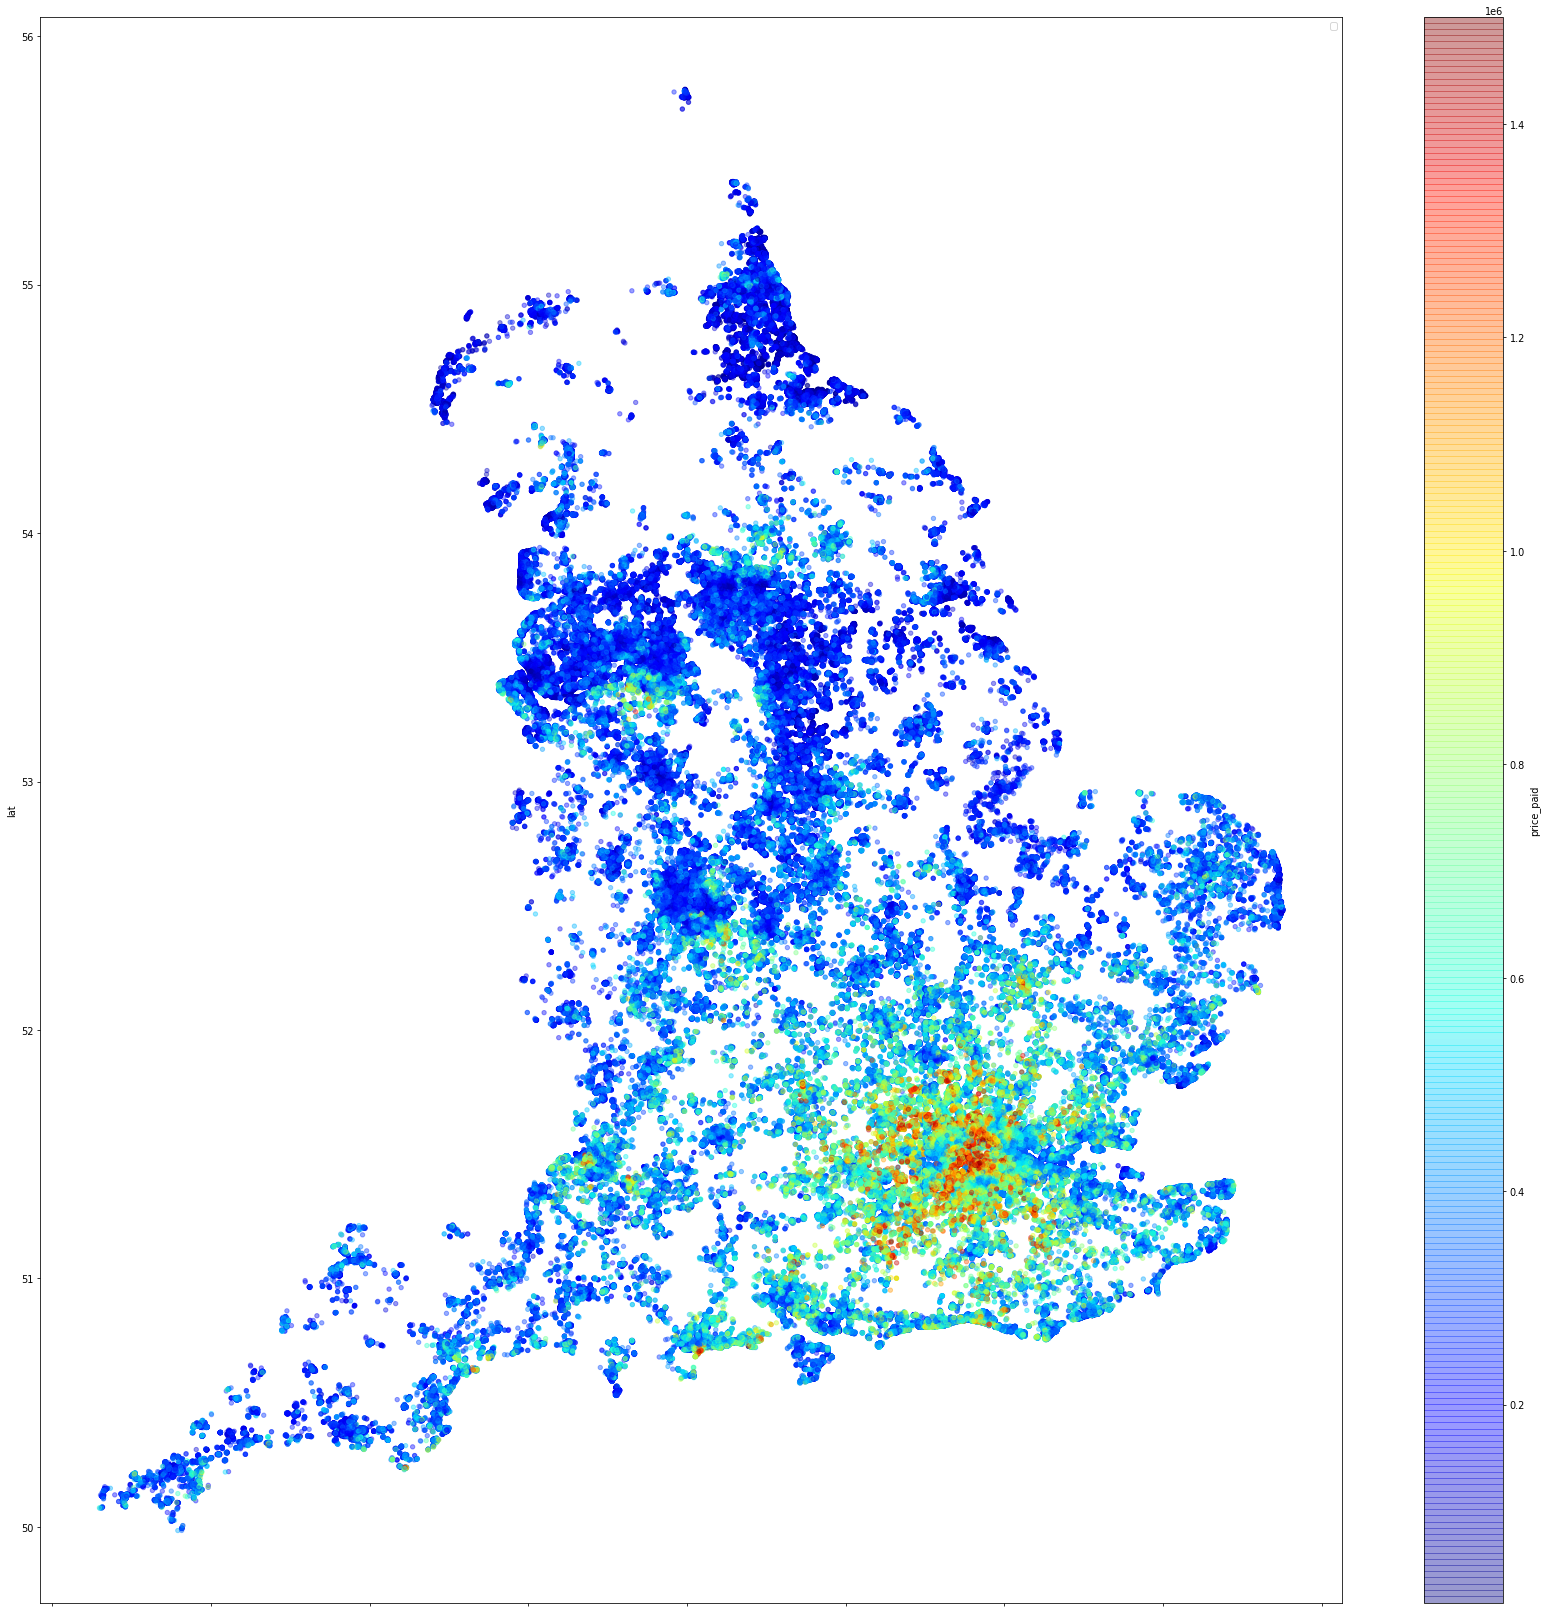

In [28]:
data_for_analysis.plot(kind="scatter", x="long", y="lat", alpha=0.4, c="price_paid", cmap=plt.get_cmap("jet"), colorbar=True)
plt.rcParams.update({'figure.figsize':(30,30), 'figure.dpi':70})
plt.legend()